<a href="https://colab.research.google.com/github/juliusshrestha/Evaluation_Metrics/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries and packages to prepare the required environment.

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


Load data, split it into train-test set, build and train the model, and make predictions on test data.



In [41]:
 # choose a binary classification problem
data = load_breast_cancer()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)

 # split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)


In [42]:
 #RF model
modelRF = RandomForestClassifier(random_state=1)
modelRF.fit(X_train, y_train)
predsRF = modelRF.predict(X_test) 

In [43]:
#LR model
modelLR = LogisticRegression(random_state=1, max_iter=10000)
modelLR.fit(X_train, y_train)
predsLR = modelLR.predict(X_test) 

In [44]:
#DT model
modelDT = DecisionTreeClassifier(random_state=1)
modelDT.fit(X_train, y_train)
predsDT = modelDT.predict(X_test) 

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

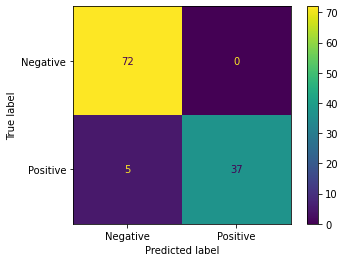

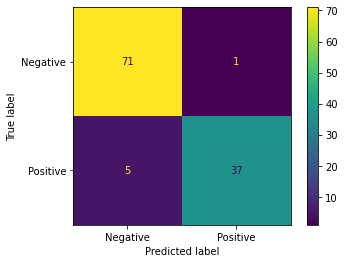

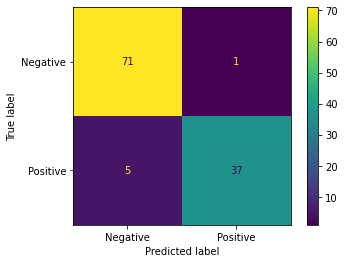

In [45]:
def con_mat(model):
  metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'] )

con_mat(modelRF)
con_mat(modelLR)
con_mat(modelDT)

In [46]:
print(metrics.classification_report(y_test, predsRF))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [47]:
print(metrics.classification_report(y_test, predsLR))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [48]:
print(metrics.classification_report(y_test, predsDT))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



ROC and AUC score

In [49]:
def roc_auc(model):
  # calculate prediction probability
  prob_train = np.squeeze(model.predict_proba(X_train)[:,1].reshape(1,-1))
  prob_test = np.squeeze(model.predict_proba(X_test)[:,1].reshape(1,-1))

  # false positive rate, true positive rate, thresholds
  fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
  fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
 
  # auc score
  auc1 = metrics.auc(fpr1, tpr1)
  auc2 = metrics.auc(fpr2, tpr2)
  plt.figure(figsize=(8,8))
  # plot auc 
  plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
  plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
  plt.plot([0,1],[0,1], 'r--')
  plt.xlim([-0.1, 1.1])
  plt.ylim([-0.1, 1.1])
  plt.xlabel('False Positive Rate', size=14)
  plt.ylabel('True Positive Rate', size=14)
  plt.legend(loc='lower right')
  plt.show()

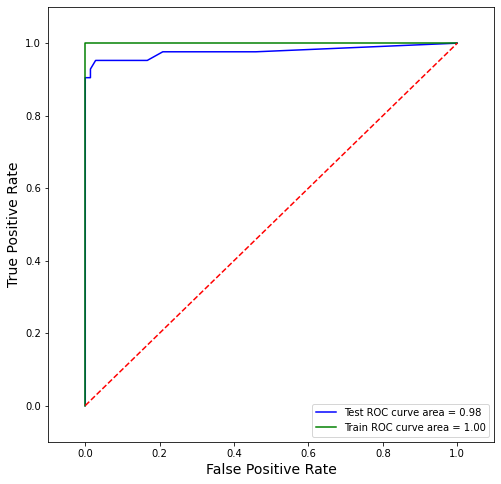

In [50]:
roc_auc(modelRF)

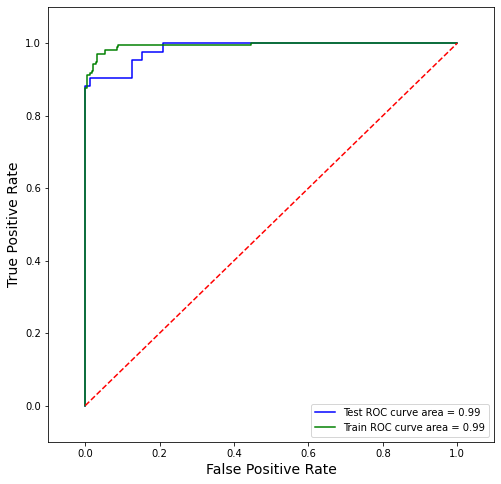

In [51]:
roc_auc(modelLR)

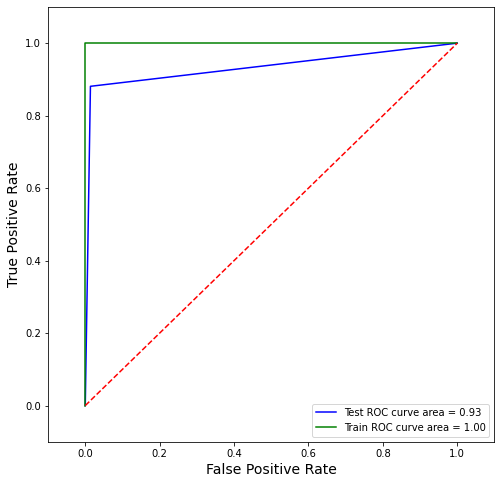

In [52]:
roc_auc(modelDT)